In [229]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import time
import random
import pandas as pd
from array import *

from scipy import signal
from scipy import misc
from scipy.spatial import distance
from skimage import measure
from skimage.draw import ellipse
from skimage.measure import find_contours, approximate_polygon, subdivide_polygon

In [230]:
def random_color():
    levels = range(32,256,32)
    return tuple(random.choice(levels) for _ in range(3))

def show_image(img):
    figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.show()

In [231]:
img = []
img4 = []
img_orig = []

### Load image

##### Insert white border around image

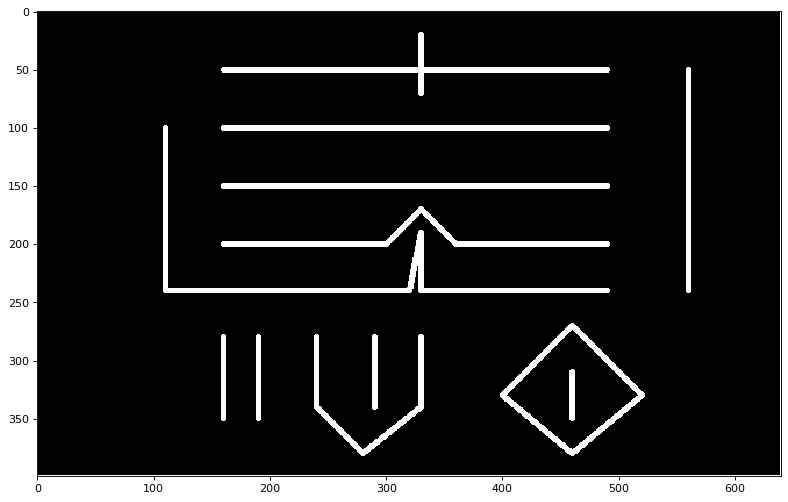

In [232]:
img = cv2.imread("map.png", cv2.IMREAD_GRAYSCALE);
backtorgb = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB);
img = backtorgb.dot([0.33,0.33,0.33])

(my,mx)=img.shape
img[0,:]=255
img[:,0]=255
img[my-1,:]=255
img[:,mx-1]=255

img_orig = img.copy()

image_data = np.stack((backtorgb[:,:,0],backtorgb[:,:,1],backtorgb[:,:,2]), axis=2)
show_image(img) 

### Process Image to find middle point between tracks

##### Difference between subsequent dilations

In [233]:
difftmp = np.array([[1,1,1],[1,0,1],[1,1,1]])
kernel = np.ones((3,3),np.uint8)
img4 = np.zeros_like(img)*0
clas = True
while clas == True:
    img2 = cv2.dilate(img,kernel,iterations = 1)
    img3 = img2-img
    if np.sum(img3)==0:
        break
    
    ### Calculate number of white pixels around this pixel
    img4 = img4+(signal.convolve2d(img3,difftmp, boundary='symm', mode='same')/255>4)*255
    
    image_data = np.stack((img3+img4,img3+img_orig,img3), axis=2)
    img = img2.copy()
image_data = np.stack((img4,img4+img3,img4), axis=2)

In [234]:
def find_first_point(img):
    (yy,xx)=img.shape
    for y in range(yy-50):
        for x in range(xx-50):
            if img[y,x]:
                return (y,x)
    return None


### Bresenham line from p1 to p2 
### returns number of non-background pixels
def get_line_vals(img,img_o,p1,p2,show=False):
    (x1,y1)=p1
    (x0,y0)=p2
    
    if x0>x1:
        (x1,y1)=p2
        (x0,y0)=p1
    
    dx = x1 - x0
    dy = y1 - y0
    D = 2*dy - dx
    y = y0
    
    if show: print(y,"-",x0,"-",y0,"-",x1,"_",y1,dx,dy,D)
    vals=0
    for x in range(x0,x1):
        if img[y,x]: vals=vals+1
        #img_o[y,x]=0
        
        if show==True: print(x,y,img[y,x])
        if D > 0:
               y = y + 1
               D = D - 2*dx
        
        D = D + 2*dy
    return vals

def find_line(img,img_o,point):
    
    radius=20
    (yy,xx)=img.shape
    
    (x,y)=point
    grp = {}
    
    for angle in range(269,90,-1):
        rad_angle=np.pi*angle/180
        x1=x+int(radius*np.sin(rad_angle))
        y1=y-int(radius*np.cos(rad_angle))
        x1 = max(0,min(xx,x1))
        y1 = max(0,min(yy,y1))
        
        grp[angle]=get_line_vals(img,img_o,(x,y),(x1,y1))
      
        
    return grp

In [235]:
img_path = img4.copy()

img_binary = img4!=0
p1 = find_first_point(img_binary)
a1 = find_line(img_binary,img4,p1)

max(a1, key=a1.get)

135

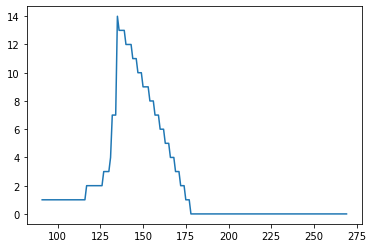

In [236]:
print()
lists = sorted(a1.items())
x, y = zip(*lists)
plt.plot(x,y)
plt.show()

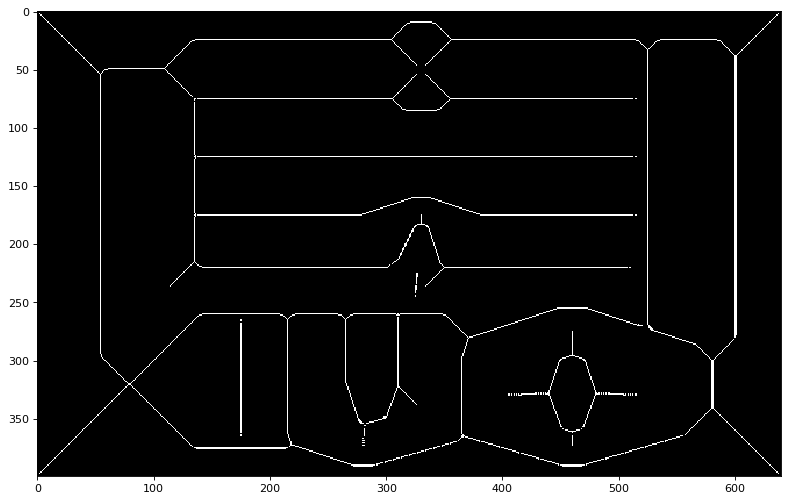

In [237]:
show_image(img4) 